# **Logistic Regression on Mushroom Quality data**
**Logistic Regression**

While Linear Regression is suited for estimating continuous values, it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, some sort of guidance is required on what would be the most probable class for that data point. For this, Logistic Regression is used.

In simple terms: 
$$ Y = b_0 + b_0X$$
<br>
With Sigmoid function applied---->
$$P = \frac {1}{1 + e^{(-y)}} $$
<br><br>
$$ln(\frac{p}{1-p}) = b_0 + b_0X$$
<br><br>
**Logistic Regression explanation in detail**

**Linear regression** finds a function that relates a continuous dependent variable, **y**, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<br>

**Logistic Regression** is a variation of Linear Regression, useful when the observed dependent variable, **y**, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma(\theta^TX) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma(\theta^TX) = \frac{e^(\theta^TX)}{1+e^(\theta^TX)} 
$$

In this equation, $(\theta^TX)$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](https://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">

The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma(\theta^TX)$, in such a way that the model best predicts the class of each case.

## **Table of Contents**

* [Dataset Information](#Dataset)
* [Method Development: Setting up the Logistic Regression Classifier](#Method)
* [Model Evaluation](#Evaluation)


### **Import required library packages:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Set Information: Mushroom Quality data**<a name="Dataset"></a>
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family . Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.
Attribute Information:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d


### **Load the Mushroom quality data**

In [2]:
df = pd.read_csv('../input/uci-mushroom-dataset/Mushroom data.csv')
df.head()

,Mushroom_quality,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### **Data Preprocessing**

In [3]:
df =df[['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalkshape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 'Mushroom_quality']]
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalkshape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,Mushroom_quality
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [4]:
print(df.size)
print(df.shape)
print(df.ndim)

186852
(8124, 23)
2


### **Label Encoding**

Some features in this dataset are categorical such as Sex or BP. Unfortunately, Sklearn Decision Trees do not handle categorical variables. To convert these features to numerical values, LabelEncoder from sklearn.preprocessing can be used to convert categorical variable into dummy/indicator variables.

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gill_attachment'] = le.fit_transform(df['gill_attachment'])
df['cap_shape'] = le.fit_transform(df['cap_shape'])
df['cap_surface'] = le.fit_transform(df['cap_surface'])
df['cap_color'] = le.fit_transform(df['cap_color'])
df['odor'] = le.fit_transform(df['odor'])
df['gill_color'] = le.fit_transform(df['gill_color'])
df['stalk_root'] = le.fit_transform(df['stalk_root'])
df['stalk_surface_above_ring'] = le.fit_transform(df['stalk_surface_above_ring'])
df['stalk_surface_below_ring'] = le.fit_transform(df['stalk_surface_below_ring'])
df['stalk_color_above_ring'] = le.fit_transform(df['stalk_color_above_ring'])
df['stalk_color_below_ring'] = le.fit_transform(df['stalk_color_below_ring'])
df['veil_color'] = le.fit_transform(df['veil_color'])
df['ring_number'] = le.fit_transform(df['ring_number'])
df['ring_type'] = le.fit_transform(df['ring_type'])
df['spore_print_color'] = le.fit_transform(df['spore_print_color'])
df['population'] = le.fit_transform(df['population'])
df['habitat'] = le.fit_transform(df['habitat'])

df['gill_spacing'] = df['gill_spacing']['c']= 1
df['gill_spacing'] = df['gill_spacing']['w']= 0

df['gill_size'] = df['gill_size'].replace({'b' : 1, 'n' : 0})

df['stalkshape'] = df['stalkshape'].map({'e': 1, 't': 0})
df["veil_type"] = df["veil_type"].apply({'u':1, 'p':0}.get)
df['bruises'] = df['bruises'].replace({'t' : 1, 'f' : 0})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap_shape                 8124 non-null   int64 
 1   cap_surface               8124 non-null   int64 
 2   cap_color                 8124 non-null   int64 
 3   bruises                   8124 non-null   int64 
 4   odor                      8124 non-null   int64 
 5   gill_attachment           8124 non-null   int64 
 6   gill_spacing              8124 non-null   int64 
 7   gill_size                 8124 non-null   int64 
 8   gill_color                8124 non-null   int64 
 9   stalkshape                8124 non-null   int64 
 10  stalk_root                8124 non-null   int64 
 11  stalk_surface_above_ring  8124 non-null   int64 
 12  stalk_surface_below_ring  8124 non-null   int64 
 13  stalk_color_above_ring    8124 non-null   int64 
 14  stalk_color_below_ring  

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
df['Mushroom_quality'] = df['Mushroom_quality'].replace({'e' : 'Edible', 'p' : 'Poisonous'})

In [7]:
# X = df.iloc[:,:-1]  
# X = df.drop('Mushroom_quality',axis=1)
# X = df[[cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalkshape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']] .values  #.astype(float)
X = df.loc[:, df.columns != 'Mushroom_quality']
X.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalkshape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,5,2,4,1,6,1,0,0,4,1,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,1,4,1,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,1,5,1,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,0,5,1,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,0,1,4,0,...,2,7,7,0,2,1,0,3,0,1


In [8]:
y = df["Mushroom_quality"]
y[0:5]

0    Poisonous
1       Edible
2       Edible
3    Poisonous
4       Edible
Name: Mushroom_quality, dtype: object

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print ('Train set- X_train shape:', X_train.shape,  ';  y_train shape:', y_train.shape)
print ('Test set- X_test shape:', X_test.shape, ';  y_train shape:', y_test.shape)

Train set- X_train shape: (5686, 22) ;  y_train shape: (5686,)
Test set- X_test shape: (2438, 22) ;  y_train shape: (2438,)


## **Method Development:**<a name="Method"></a>
Build the model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.

__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 

Now fit the model with train set:

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [11]:
y_pred = LR.predict(X_test)
y_pred

array(['Edible', 'Edible', 'Edible', ..., 'Edible', 'Poisonous',
       'Poisonous'], dtype=object)

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=1|X), and second column is probability of class 1, P(Y=0|X):

In [12]:
y_pred_prob = LR.predict_proba(X_test)
y_pred_prob[0:5]

array([[0.88849273, 0.11150727],
       [0.88329675, 0.11670325],
       [0.93655442, 0.06344558],
       [0.63868665, 0.36131335],
       [0.89842799, 0.10157201]])

## **Model Evaluation - Logistic Regression Classification**<a name="Evaluation"></a>
KEY PERFORMANCE INDICATORS (KPI): Generating the Confusion Matrix and Classification report

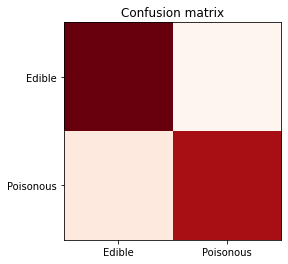

In [13]:
from sklearn.metrics import confusion_matrix
predict_train = LR.predict(X_train)
cm = confusion_matrix(y_train, predict_train)
plt.imshow(cm, cmap=plt.cm.Reds, interpolation='nearest')
plt.xticks(np.arange(0, 2), ['Edible', 'Poisonous'])
plt.yticks(np.arange(0, 2), ['Edible', 'Poisonous'])
plt.title('Confusion matrix');

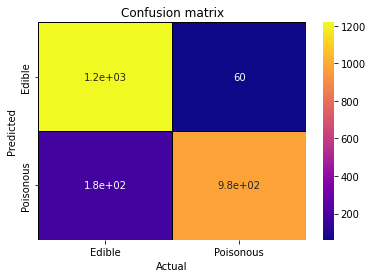

In [14]:
y_pred = LR.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.title('Confusion matrix')
sns.heatmap(cm, annot=True, cmap = 'plasma',  linecolor='black', linewidths=1)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.xticks(np.arange(0.5, 2.5), ['Edible', 'Poisonous'])
plt.yticks(np.arange(0.5, 2.5), ['Edible', 'Poisonous']);

**Mushrooms with Edible Quality**

The first column is for mushrooms with quality in test set is edible. As can be calculated, out of 2438 mushroom samples, the quality of 1401 of them is edible. And out of these 1401, the classifier correctly predicted 1219 of them as edible, and 60 of them as poisonous. 

It means, for 1215 samples, the actual quality were edible in test set, and classifier also correctly predicted those as edible. However, while the actual label of 60 samples were edible, the classifier predicted those as poisonous, which is good. 

**Mushrooms with Poisonous Quality**

The classifier correctly predicted only 977 of them as poisonous, and 182 of them wrongly as edible. So, it has done a very bad job in predicting the mushroom samples with poisonous quality. Consider it as error of the model for second column.  

A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes. In specific case of binary classifier, such as this example, these numbers can be interpreted as the count of true positives, false positives, true negatives, and false negatives on the basis of testing for poisonous quality of mushroom samples.

In this case, the model failed to detect 182 poisonous sample which is a very serious issue to be considered. So Important metric when we care about false negatives is recall. Recall is also called True Positive rate or sensitivity

**Recall**

Recall = TP/ Actual TRUE = TP/ (TP+FN) (when the class was actually TRUE, how often did the classiﬁer get it right?)
<br><br>
$$Recall = \frac{True Positive}{True Positive + False Negative}$$
<br>
$$Recall = \frac{977}{977+182} = 0.84$$ 
<br><br>
**Precision**

Precision = TP/Total TRUE Predictions (When model predicted TRUE class, how often was it right?) 

Precision is an important metric when False positives are important. In this case model wrongly predicted 60 edible mushrooms as poisonous. Its not a big deal. 
<br><br>
$$Precision = \frac{True Positives}{True Positives + False Positives}$$
<br>
$$Precision = \frac{977}{977+60} = 0.94$$
<br>
Here false negative is to be given more importance than false positives, focus should be on Recall metric.

Classiﬁcation Accuracy = (TP+TN) / (TP + TN + FP + FN) 

Misclassiﬁcation rate (Error Rate) = (FP + FN) / (TP + TN + FP + FN) 

In unbalanced datasets, if we have large number of true negatives (healthy patients), accuracy could be misleading. Therefore, F1 score might be a better KPI to use since it provides a balance between recall and precision in the presence of unbalanced datasets. 
F1 Score is an overall measure of a model's accuracy that combines precision and recall. 
F1 score is the harmonic mean of precision and recall. 
<br><br>
$$F1 Score = \frac{2 x Precision x Recall}{Precision + Recall}$$
<br> <br>
$$F1 Score = \frac{2 x TP}{2 x TP + FP +FN}$$

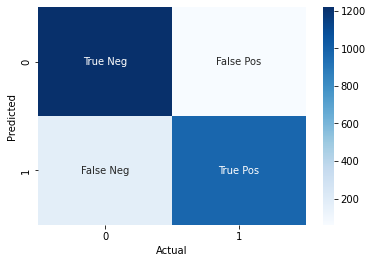

In [15]:
label = ["True Neg", "False Pos", "False Neg", "True Pos"]
label = np.asarray(label).reshape(2,2)
sns.heatmap(cm, annot=label, cmap='Blues', fmt='')
plt.xlabel("Actual")
plt.ylabel("Predicted");

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
accuracy = (y_pred == y_test).sum() / len(y_test)
print('Accuracy of Logistic Regression Model calculated manually is ', accuracy.round(2))
print('Accuracy of Logistic Regression Model is ', accuracy_score(y_test, y_pred))
print('\n', '\n','Confusion Matrix of Logistic Regression Model:' '\n', confusion_matrix(y_test, y_pred))
print('\n', '\n','Classification Report for Logistic Regression Model:' '\n',classification_report(y_test, y_pred))
from sklearn.metrics import jaccard_score

Accuracy of Logistic Regression Model calculated manually is  0.9
Accuracy of Logistic Regression Model is  0.9007383100902379

 
 Confusion Matrix of Logistic Regression Model:
 [[1219   60]
 [ 182  977]]

 
 Classification Report for Logistic Regression Model:
               precision    recall  f1-score   support

      Edible       0.87      0.95      0.91      1279
   Poisonous       0.94      0.84      0.89      1159

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438

